In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt

2025-05-30 12:38:06.168252: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-30 12:38:06.798177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748630287.003624  115899 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748630287.064146  115899 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748630287.618913  115899 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

### Lectura de datos

In [2]:
file = "ai_dev_prod.csv"
df = pd.read_csv(file)
df.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


### Preparación de Datos

In [5]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]
x_cols = {}
y_cols = {}
X.columns, Y.columns

(Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
        'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load'],
       dtype='object'),
 Index(['task_success'], dtype='object'))

In [6]:
for col in X.columns:
    maxim = X[col].max()
    x_cols[col] = maxim
    X[col] = X[col] / maxim


In [7]:
# Transformación de los datos
# X = X.T
# Y = Y.T
X = np.array(X)
Y = np.array(Y)

In [8]:
X.shape, Y.shape

((500, 8), (500, 1))

adding: model.add(tf.keras.layers.Dense(10, activation='relu'))
adding: model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
Pérdida final: 0.0173
Accuracy final: 0.9800


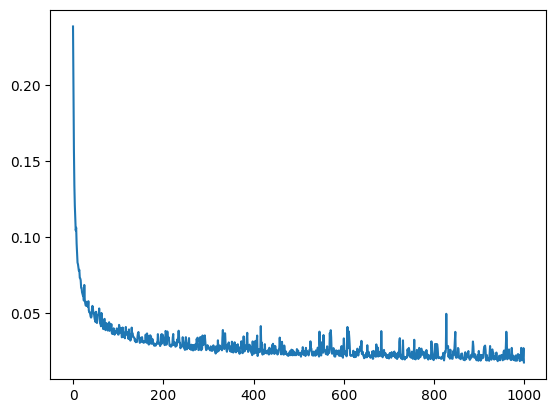

In [97]:
pasos = 1000
batch = 32
capas = (
    (10, 'relu'),
    (1, 'sigmoid'),
)

model = tf.keras.Sequential(name="idp")
model.add(tf.keras.layers.InputLayer(shape=(8,)))
for capa in capas:
    print(f"adding: model.add(tf.keras.layers.Dense({capa[0]}, activation='{capa[1]}'))")
    exec(f"model.add(tf.keras.layers.Dense({capa[0]}, activation='{capa[1]}'))")

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

# model.summary()
history = model.fit(X, Y, epochs=pasos, batch_size=batch, verbose=0)
print(f"Pérdida final: {history.history['loss'][-1]:.4f}")
print(f"Accuracy final: {history.history['accuracy'][-1]:.4f}")
lost_hist = history.history["loss"]
sns.lineplot(lost_hist)
plt.show()

In [87]:
def predict(predict_data, decs = 5):
    data = pd.DataFrame.from_dict(predict_data)
    for col in x_cols.keys():
        data[col] = data[col] / x_cols[col]
    x_pred = np.array(data)
    pred = model.predict(x_pred, verbose=0)
    pred = [round(p[0], decs) for p in pred]
    return pred
    return round(pred[0][0], decs)

In [99]:


predict_data = [
    {
        "hours_coding": 8,
        "coffee_intake_mg": 0,
        "distractions": 0,
        "sleep_hours": 8,
        "commits": 2,
        "bugs_reported": 1,
        "ai_usage_hours": 0,
        "cognitive_load": 4,
    },
    {
        "hours_coding": 4,
        "coffee_intake_mg": 10000,
        "distractions": 10,
        "sleep_hours": 0,
        "commits": 2,
        "bugs_reported": 30,
        "ai_usage_hours": 0,
        "cognitive_load": 4,
    },
    {
        "hours_coding": 400,
        "coffee_intake_mg": 0,
        "distractions": 10,
        "sleep_hours": 0,
        "commits": 2,
        "bugs_reported": 30,
        "ai_usage_hours": 0,
        "cognitive_load": 4,
    }
]
predict(predict_data)


[np.float32(1.0), np.float32(1.0), np.float32(1.0)]